importing the libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

importing the dataset

In [25]:
df = pd.read_csv("wine-clustering.csv")
scaler = StandardScaler()
X = scaler.fit_transform(df)
n_clusters = range(1, 11)
aic_values = []
bic_values = []
for k in n_clusters:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    aic_values.append(gmm.aic(X))
    bic_values.append(gmm.bic(X))


plotting the aic and bic

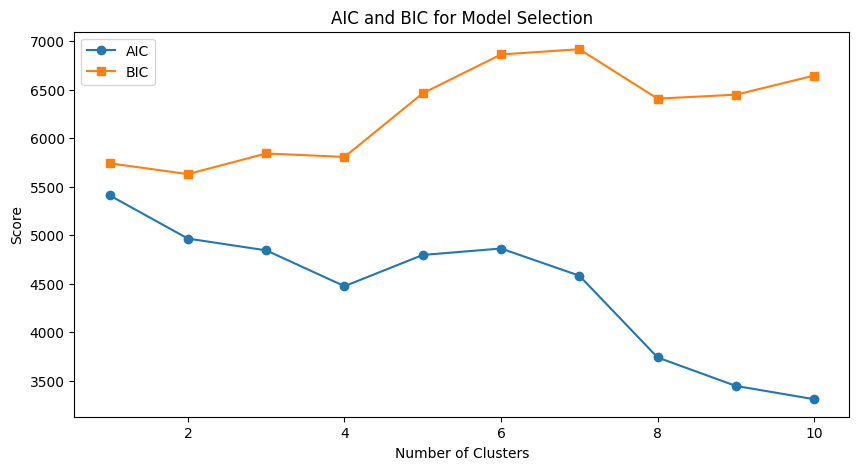

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, aic_values, marker='o', label='AIC')
plt.plot(n_clusters, bic_values, marker='s', label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC for Model Selection')
plt.legend()
plt.show()

choosing the number of clusters

In [27]:
optimal_k = np.argmin(bic_values) + 1
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


fitting it with optimal clusters

In [28]:
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
clusters_gmm = gmm.fit_predict(X)
df['GMM_Cluster'] = clusters_gmm

comparing it with k means

In [29]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)
df['KMeans_Cluster'] = kmeans_clusters

calculating the silhouette scores

In [30]:
gmm_silhouette = silhouette_score(X, clusters_gmm)
kmeans_silhouette = silhouette_score(X, kmeans_clusters)
print(f"Silhouette Score (GMM): {gmm_silhouette:.4f}")
print(f"Silhouette Score (K-Means): {kmeans_silhouette:.4f}")


Silhouette Score (GMM): 0.2682
Silhouette Score (K-Means): 0.2650


identifying the most influential features

In [31]:
feature_weights = np.abs(gmm.means_).sum(axis=0)
influential_features = df.columns[np.argsort(feature_weights)[-5:]]
print("Most influential chemical properties:", influential_features.tolist())


Most influential chemical properties: ['Proanthocyanins', 'Total_Phenols', 'Hue', 'Flavanoids', 'OD280']


visualizing the clusters

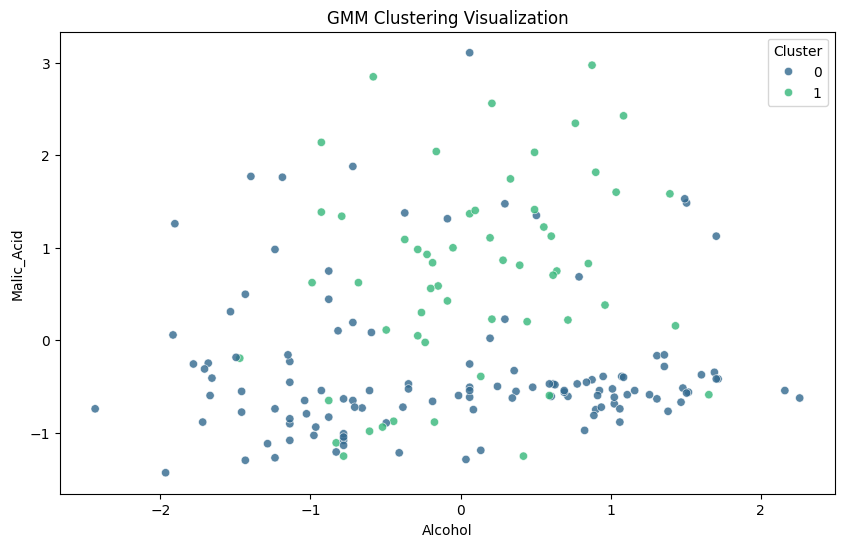

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters_gmm, palette='viridis', alpha=0.8)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("GMM Clustering Visualization")
plt.legend(title="Cluster")
plt.show()
